# Euro Data Cube - Xcube Validation
## Test 3 xcube Time-series
This validation test demonstrates the following features: 
* Time-series capbilites:
    * list time stamps for variable
    * compute time-series for point
    * compute time-series for geometry
   

## Requirements

To run this notebook you need your [Sentinel Hub API authentication](https://docs.sentinel-hub.com/api/latest/#/API/authentication) information and a Python environment
with `xcube` and the xcube plugin `xcube_sh` installed.

Checkout [xcube sources](https://github.com/dcs4cop/xcube) and follow instructions in its [README.md](https://github.com/dcs4cop/xcube/blob/master/README.md).

After activating the `xcube` Python environment, install additional packages required for Sentinel Hub API authentication:

```bash
$ conda activate xcube
(xcube) $ conda install -c conda-forge oauthlib
(xcube) $ pip install requests_oauthlib
```

Then checkout [xcube_sh sources](https://gitext.sinergise.com/dcfs/xcube-dcfs.git) and follow instructions in its [README.md](https://gitext.sinergise.com/dcfs/xcube-dcfs/blob/master/README.md).

Your Sentinel Hub API credentials can be passed as keyword arguments to the `SentinelHub` constructor (see below) or passed as environment variables (preferred): 

```bash
(xcube) $ export SH_CLIENT_ID=<your-id>
(xcube) $ export SH_CLIENT_SECRET=<your-secret>
```


In [2]:
from xcube_sh.config import CubeConfig
from xcube_sh.cube import open_cube
from xcube_sh.sentinelhub import SentinelHub
from xcube.core.geom import clip_dataset_by_geometry
import matplotlib.pyplot as plt

In [3]:
import gdal

In [4]:
x1 = 10.07  # degree
y1 = 54.20  # degree
x2 = 10.2  # degree
y2 = 54.30  # degree

bbox = x1, y1, x2, y2

In [5]:
spatial_res = 0.00018   # = 20.038 meters in degree

In [6]:
cube_config = CubeConfig(dataset_name='S2L2A',
                         band_names=['B04'],
                         chunk_size=[512, 512],
                         geometry=bbox,
                         spatial_res=spatial_res,
                         time_range=['2018-01-01', '2019-12-31'],
                         time_tolerance='1d')  

In [7]:
cube = open_cube(cube_config, request_warnings=True)

TypeError: __init__() got an unexpected keyword argument 'request_warnings'

## List time stamps vor observations

In [13]:
cube.time.data

array(['2018-01-03T10:44:24.000000000', '2018-01-05T10:34:19.000000000',
       '2018-01-08T10:44:15.000000000', '2018-01-10T10:34:07.000000000',
       '2018-01-13T10:44:03.000000000', '2018-01-15T10:34:54.000000000',
       '2018-01-18T10:45:24.000000000', '2018-01-20T10:33:35.000000000',
       '2018-01-23T10:43:26.000000000', '2018-01-25T10:34:42.000000000',
       '2018-01-28T10:43:05.000000000', '2018-01-30T10:35:17.000000000',
       '2018-02-02T10:42:38.000000000', '2018-02-04T10:35:32.000000000',
       '2018-02-07T10:42:12.000000000', '2018-02-09T10:31:52.000000000',
       '2018-02-12T10:41:37.000000000', '2018-02-14T10:31:25.000000000',
       '2018-02-17T10:41:52.000000000', '2018-02-19T10:30:46.000000000',
       '2018-02-22T10:40:35.000000000', '2018-02-24T10:30:18.000000000',
       '2018-02-27T10:42:36.000000000', '2018-03-01T10:30:13.000000000',
       '2018-03-04T10:44:07.000000000', '2018-03-06T10:32:21.000000000',
       '2018-03-09T10:40:22.000000000', '2018-03-16

## Get time-series for point, nearest neigbhour and spatially interpolated

KeyboardInterrupt: 

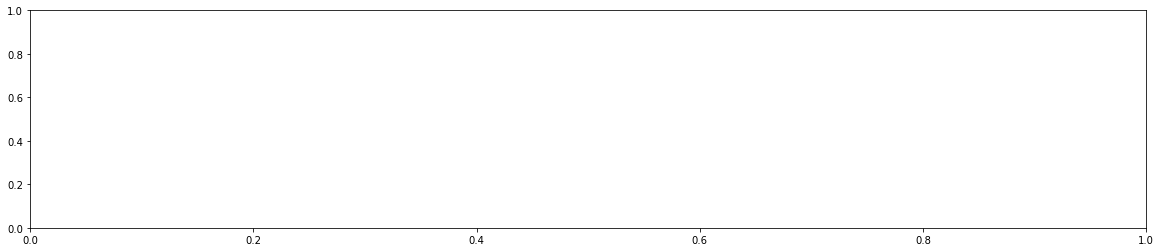

In [14]:
cube.B04.sel(lon=10.071, lat=54.285, method='nearest').plot.line(figsize=[20,4])

In [ ]:
cube.B04.interp(lon=10.071,lat=54.285, method='linear').plot.line(ax=ax, linestyle='--')

## Time-series for geometry

In [ ]:
SH.band_names('S2L1C')

In [ ]:
cube_config = CubeConfig(dataset_name='S2L1C',
                         band_names=['B04'],
                         chunk_size=[512, 512],
                         geometry=bbox,
                         spatial_res=spatial_res,
                         time_range=['2018-05-14', '2018-07-31'],
                         time_tolerance='30M')  

In [ ]:
cube = open_cube(cube_config)
cube

In [ ]:
cube.B04.isel(time=5, lat=slice(0,2000),lon=slice(0,2000)).plot.imshow(cmap='Greys', vmax = .17)

## Sentinel-1 GRD

In [ ]:
SH.band_names('S1GRD')

In [ ]:
x1 = 10.00  # degree
y1 = 54.27  # degree
x2 = 10.50  # degree
y2 = 54.60  # degree

bbox = x1, y1, x2, y2

In [ ]:
spatial_res = 0.00018 

In [ ]:
cube_config = CubeConfig(dataset_name='S1GRD',
                         band_names=['VH'],
                         chunk_size=[512, 512],
                         crs = "http://www.opengis.net/def/crs/EPSG/0/4326",
                         spatial_res = spatial_res,
                         geometry=bbox,
                         time_range=['2019-05-14', '2019-07-31'],
                         time_period='2D')  

In [ ]:
cube = open_cube(cube_config)
cube

In [ ]:
cube.VH.isel(time=1).plot.imshow(cmap='Greys',vmax =0.08, figsize = [16,12])

In [ ]:
SH.dataset_names

## Digital Elevation Model

In [ ]:
SH.band_names('DEM')

In [ ]:
x1 = 10.00  # degree
y1 = 54.27  # degree
x2 = 10.50  # degree
y2 = 54.40  # degree

bbox = x1, y1, x2, y2

In [ ]:
spatial_res = 0.0002

In [ ]:
cube_config = CubeConfig(dataset_name='DEM',
                         band_names=['DEM'],
                         chunk_size=[512, 512],
                         crs = "http://www.opengis.net/def/crs/EPSG/0/4326",
                         spatial_res = spatial_res,
                         geometry=bbox,
                         time_range=['2019-05-14', '2019-07-31'],
                         time_period='100D')  

In [ ]:
cube = open_cube(cube_config)
cube

In [ ]:
cube.DEM.isel(time=0).plot.imshow(vmin = -50, figsize = [14,10])